In [1]:
import pandas as pd
import numpy as np
import sys
import json 
import random
import math
import collections
import seaborn as sns
import os

#!{sys.executable} -m pip install python-igraph
#!{sys.executable} -m pip install igraph
from collections import defaultdict
from scipy.stats.stats import pearsonr

from matplotlib import pyplot as plt
#!{sys.executable} -m pip install cdlib

import networkx as nx
import dynetx as dn
import cdlib
from cdlib import algorithms as cd
from cdlib import readwrite, viz, evaluation

# Preparation
2007 0
2008 0
2009 7
2010 45
2011 1846
2012 19305
2013 56023
2014 85569
2015 193365
2016 322918
2017 354174
2018 310313
2019 289450
2020 75629
2021 245


In [16]:
import os 
data = dict()


G = dn.DynGraph(edge_removal=True)

for f in os.listdir('../../data/months/'):
    if f.find('.weighted.edgelist')>=0:
        
        t = int(f[:5])
        print(t,end= ' -> ')
        with open('../../data/months/'+f,'r') as gf:
            for line in gf.readlines():
                u,v,w = line.split(' ')
                
                G.add_interaction(u,v,t)
            
            

24095 -> 24096 -> 24097 -> 24098 -> 24100 -> 24101 -> 24102 -> 24103 -> 24104 -> 24105 -> 24106 -> 24107 -> 24108 -> 24109 -> 24110 -> 24111 -> 24112 -> 24113 -> 24114 -> 24115 -> 24116 -> 24117 -> 24118 -> 24119 -> 24120 -> 24121 -> 24122 -> 24123 -> 24124 -> 24125 -> 24126 -> 24127 -> 24128 -> 24129 -> 24130 -> 24131 -> 24132 -> 24133 -> 24134 -> 24135 -> 24136 -> 24137 -> 24138 -> 24139 -> 24140 -> 24141 -> 24142 -> 24143 -> 24144 -> 24145 -> 24146 -> 24147 -> 24148 -> 24149 -> 24150 -> 24151 -> 24152 -> 24153 -> 24154 -> 24155 -> 24156 -> 24157 -> 24158 -> 24159 -> 24160 -> 24161 -> 24162 -> 24163 -> 24164 -> 24165 -> 24166 -> 24167 -> 24168 -> 24169 -> 24170 -> 24171 -> 24172 -> 24173 -> 24174 -> 24175 -> 24176 -> 24177 -> 24178 -> 24179 -> 24180 -> 24181 -> 24182 -> 24183 -> 24184 -> 24185 -> 24186 -> 24187 -> 24188 -> 24189 -> 24190 -> 24191 -> 24192 -> 24193 -> 24194 -> 24195 -> 24196 -> 24197 -> 24198 -> 24199 -> 24200 -> 24201 -> 24202 -> 24203 -> 24204 -> 24205 -> 24206 -> 2

In [17]:
print(len(G.nodes()),len(G.edges()))

13386 317481


In [18]:
dn.write_snapshots(G, '../data/months.weighted.edgelist')

In [19]:
df = pd.read_csv('../data/months.weighted.edgelist',header=None, sep=' ', names = ['u','v','t'])
df.head()

,u,v,t
0,23,3894,24118
1,23,3927,24118
2,23,6773,24118
3,23,12951,24141
4,23,13109,24141


In [35]:
print(len(df.t.unique()))
      
valcnt = sorted(df.t.value_counts().items(),key=lambda x: x[0])

125


In [37]:
t,cnt = zip(*sorted(df.t.value_counts().items(),key=lambda x: x[0]))

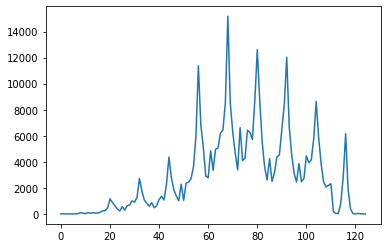

In [38]:
plt.plot(cnt)

## Tiles

In [4]:
G = dn.read_snapshots('../data/years.weighted.edgelist', nodetype=int, timestamptype=int)


In [39]:
tiles = cd.tiles(G)

KeyboardInterrupt: 

In [17]:

readwrite.write_community_json(tiles,'../data/years_tiles.json')

AttributeError: 'TemporalClustering' object has no attribute 'communities'

In [25]:
for i,c in tiles.clusterings.items(): readwrite.write_community_json(c,f'../data/years/{str(i)}.json')

In [23]:
for c in tiles.clusterings: print(c)

0
1
2
3
4
5
6
7
8
9
10
11
12
13


In [31]:
with open('../data/years/tiles.json','w+') as jf:
    json.dump(tiles.to_json(),jf)

In [33]:
tiles.get_explicit_community_match()

[('3_9', '4_4'),
 ('4_4', '5_3'),
 ('4_32', '5_27'),
 ('4_43', '5_3'),
 ('5_3', '6_1'),
 ('4_12', '5_3'),
 ('4_15', '5_3'),
 ('4_19', '5_3'),
 ('4_24', '5_3'),
 ('4_28', '5_3'),
 ('4_29', '5_3'),
 ('4_34', '5_3'),
 ('4_35', '5_3'),
 ('4_36', '5_3'),
 ('4_37', '5_3'),
 ('4_38', '5_3'),
 ('4_40', '5_3'),
 ('4_42', '5_3'),
 ('4_44', '5_3'),
 ('4_46', '5_3'),
 ('4_49', '5_3'),
 ('4_50', '5_3'),
 ('4_51', '5_3'),
 ('4_54', '5_3'),
 ('4_55', '5_3'),
 ('4_57', '5_3'),
 ('4_58', '5_3'),
 ('4_64', '5_3'),
 ('4_65', '5_3'),
 ('4_73', '5_3'),
 ('4_13', '5_11'),
 ('5_11', '6_1'),
 ('4_14', '5_11'),
 ('4_18', '5_11'),
 ('4_25', '5_23'),
 ('5_23', '6_1'),
 ('4_56', '5_23'),
 ('4_130', '5_23'),
 ('4_132', '5_23'),
 ('4_144', '5_23'),
 ('4_164', '5_23'),
 ('4_169', '5_23'),
 ('4_173', '5_23'),
 ('4_194', '5_23'),
 ('4_195', '5_23'),
 ('4_197', '5_23'),
 ('4_200', '5_23'),
 ('4_213', '5_23'),
 ('4_246', '5_23'),
 ('4_248', '5_23'),
 ('4_256', '5_23'),
 ('4_259', '5_23'),
 ('4_277', '5_23'),
 ('4_291', 

In [39]:
for i,comms in tiles.clusterings.items():
    print(i,') ',len(comms.communities),' -> ',[ len(c) for c in comms.communities[:20]])
   
    

0 )  0  ->  []
1 )  0  ->  []
2 )  10  ->  [0, 0, 0, 0, 0, 0, 0, 4, 0, 0]
3 )  311  ->  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4 )  622  ->  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
5 )  799  ->  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
6 )  736  ->  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
7 )  806  ->  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
8 )  952  ->  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
9 )  1014  ->  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0]
10 )  1153  ->  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
11 )  1352  ->  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
12 )  494  ->  [300, 267, 240, 221, 109, 102, 99, 93, 92, 91, 84, 76, 73, 69, 60, 55, 54, 53, 52, 46]
13 )  494  ->  [300, 267, 240, 221, 109, 102, 99, 93, 92, 91, 84, 76, 73, 69, 60, 55, 54, 53, 52, 46]


In [37]:
for node in list(G.nodes())[:10]:print(node/2)

TypeError: unsupported operand type(s) for /: 'str' and 'int'